<a href="https://colab.research.google.com/github/s2ul2/This-is-coding-test-with-Python/blob/main/%EC%B5%9C%EB%8B%A8_%EA%B2%BD%EB%A1%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chap 9

* 최단거리 알고리즘 : 다익스트라, 폴로이드 워셜
* 다양한 문제 상황
1. 한 지점에서 다른 한 지점까지의 최단 경로
2. 한 지점에서 다른 모든 지점까지
3. 모든 지점에서 다른 모든 지점


# 다익스트라

* 특정 노드 -> 다른 모든 노드로 가는 최단경로
* 주의 : 모든 간선의 가중치가 같을 경우 최단거리 : bfs 사용
* 그리디 알고리즘 : 매 상황에서 가장 비용이 적은 노드를 선택

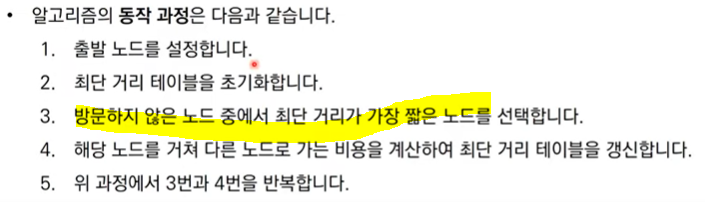

* 특징

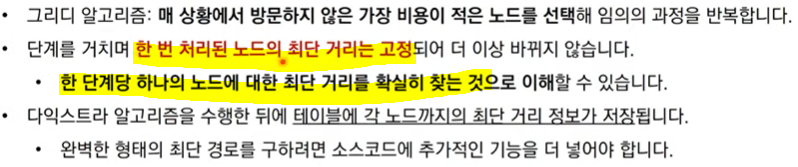

## 우선순위큐를 이용한 구현

* 우선순위 큐를 구현하기 위해 사용하는 자료구조 : 최소 힙, 최대 힙


* 최소 힙 : 가장 작은 값이 먼저 꺼내짐.
* 최소 힙을 이용한 힙정렬 (오름차순 정렬)

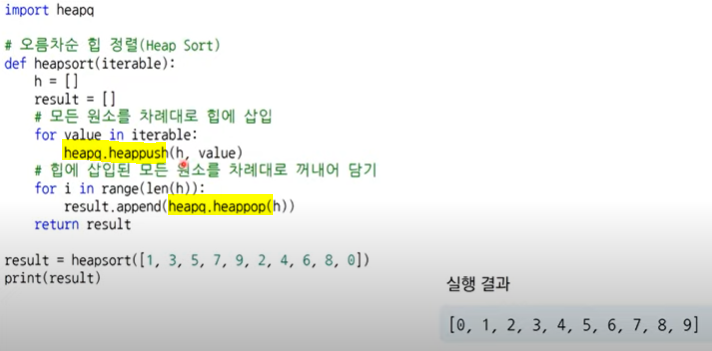

* 최대 힙 : 가장 큰 값이 먼저 꺼내짐
* 최대 힙을 이용한 힙정렬(내림차순 정렬)

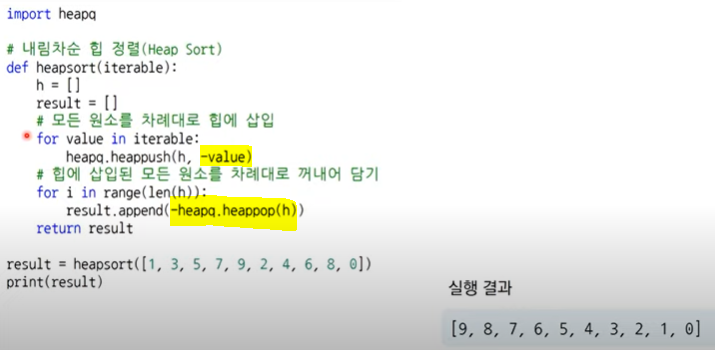

힙에 데이터를 삽입할 때 -값을 붙이고 데이터를 꺼낼 때 다시 -값을 붙여서 출력하면 가장 큰 값이 먼저 출력된다.

* 단계마다 방문하지 않은 노드 중에서 최단거리가 가장 짧은 노드를 선택할 때 "최소힙" 자료구조를 사용한다.

In [2]:
import heapq
INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

# 노드의 개수, 간선의 개수를 입력받기
n, m = map(int, input().split())
# 시작 노드 번호를 입력받기
start = int(input())
# 각 노드에 연결되어 있는 노드에 대한 정보를 담는 리스트를 만들기
graph = [[] for i in range(n + 1)]
# 최단 거리 테이블을 모두 무한으로 초기화
distance = [INF] * (n + 1)

# 모든 간선 정보를 입력받기
for _ in range(m):
    a, b, c = map(int, input().split())
    # a번 노드에서 b번 노드로 가는 비용이 c라는 의미
    graph[a].append((b, c))

def dijkstra(start):
    q = []
    # 시작 노드로 가기 위한 최단 경로는 0으로 설정하여, 큐에 삽입
    heapq.heappush(q, (0, start)) # (거리, 노드번호)
    distance[start] = 0
    while q: # 큐가 비어있지 않다면
        # 가장 최단 거리가 짧은 노드에 대한 정보 꺼내기
        dist, now = heapq.heappop(q)
        # 현재 노드가 이미 처리된 적이 있는 노드라면 무시
        if distance[now] < dist:
            continue
        # 현재 노드와 연결된 다른 인접한 노드들을 확인
        for i in graph[now]:
            cost = dist + i[1]
            # 현재 노드를 거쳐서, 다른 노드로 이동하는 거리가 더 짧은 경우
            if cost < distance[i[0]]:
                distance[i[0]] = cost
                heapq.heappush(q, (cost, i[0]))

# 다익스트라 알고리즘을 수행
dijkstra(start)

# 모든 노드로 가기 위한 최단 거리를 출력
for i in range(1, n + 1):
    # 도달할 수 없는 경우, 무한(INFINITY)이라고 출력
    if distance[i] == INF:
        print("INFINITY")
    # 도달할 수 있는 경우 거리를 출력
    else:
        print(distance[i])

6 5
1
1 2 2
1 3 5
1 4 1
2 3 3
2 4 2


[[], [(2, 2), (3, 5), (4, 1)], [(3, 3), (4, 2)], [], [], [], []]

In [4]:
# 연습
import heapq
# n : 노드 개수, m : 간선 개수
n, m = map(int, input().split())
start =int(input())
inf = int(1e9)
distance = [inf] * (n+1)
graph = [[] for i in range(n+1)]

for i in range(m):
    a, b, c = map(int, input().split()) # a노드 -> b노드 : c(비용)
    graph[a].append((b,c))

print(graph)

def dijkstra(start):
    hq = []
    heapq.heappush(hq, (0, start)) # 출발 노드의 최단 거리는 0
    distance[start] = 0
    while hq:
        dist, now = heapq.heappop(hq) # hq에서 거리가 가장 짧은 노드 출력
        if distance[now] < dist: # 이미 처리된 노드는 while문 처음으로
            continue 
        for node, node_dst in graph[now]: # 현재 노드에서 거쳐갈 수 있는 다른 노드
            cost = dist + node_dst
            if cost < distance[node]: # 갱신
                distance[node] = cost
                heapq.heappush(hq, (cost, node))

dijkstra(start)

# 하나의 출발점에서 다른 모든 노드로 가기 위한 최단 거리를 출력
for i in range(1, n + 1):
    # 도달할 수 없는 경우, 무한(INFINITY)이라고 출력
    if distance[i] == INF:
        print("INFINITY")
    # 도달할 수 있는 경우 거리를 출력
    else:
        print(distance[i])       

6 11
1
1 2 2
1 3 5
1 4 1
2 3 3
2 4 2
3 2 3
3 6 5
4 3 3
4 5 1
5 3 1
5 6 2
[[], [(2, 2), (3, 5), (4, 1)], [(3, 3), (4, 2)], [(2, 3), (6, 5)], [(3, 3), (5, 1)], [(3, 1), (6, 2)], []]
0
2
3
1
2
4


# 플루이드 워셜

* 모든 노드 -> 다른 노드까지의 최단 경로 모두 계산
* 최단 거리 정보 : 2차원 테이블
* 플로이드 워셜 알고리즘은 다이나믹 프로그래밍 유형에 속함.

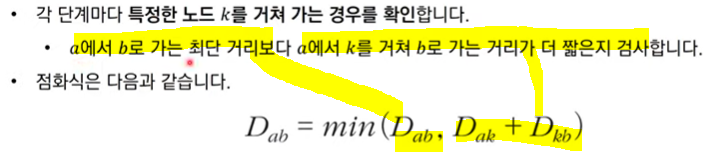

* 과정

1.
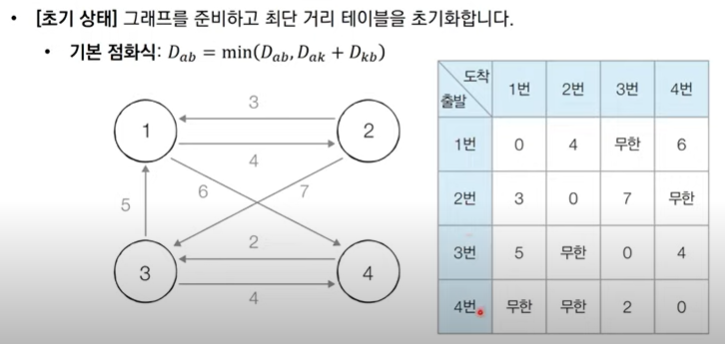

2.
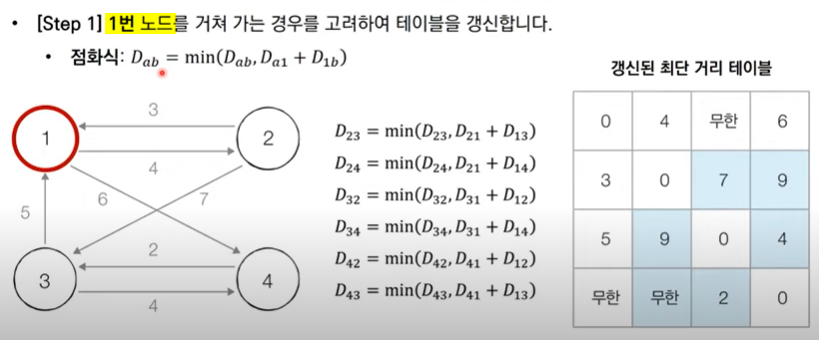

3.  모든 노드에 대해 반복

4.
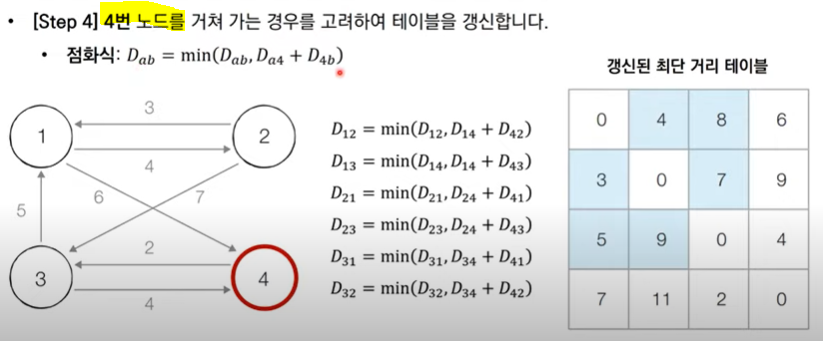


In [ ]:
INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

# 노드의 개수 및 간선의 개수를 입력받기
n = int(input())
m = int(input())
# 2차원 리스트(그래프 표현)를 만들고, 모든 값을 무한으로 초기화
graph = [[INF] * (n + 1) for _ in range(n + 1)]

# 자기 자신에서 자기 자신으로 가는 비용은 0으로 초기화
for a in range(1, n + 1):
    for b in range(1, n + 1):
        if a == b:
            graph[a][b] = 0

# 각 간선에 대한 정보를 입력 받아, 그 값으로 초기화
for _ in range(m):
    # A에서 B로 가는 비용은 C라고 설정
    a, b, c = map(int, input().split())
    graph[a][b] = c

# 점화식에 따라 플로이드 워셜 알고리즘을 수행
for k in range(1, n + 1): # 거쳐가는 노드
    for a in range(1, n + 1): # 출발 노드
        for b in range(1, n + 1): # 도착 노드
            graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])

# 수행된 결과를 출력
for a in range(1, n + 1):
    for b in range(1, n + 1):
        # 도달할 수 없는 경우, 무한(INFINITY)이라고 출력
        if graph[a][b] == 1e9:
            print("INFINITY", end=" ")
        # 도달할 수 있는 경우 거리를 출력
        else:
            print(graph[a][b], end=" ")
    print()

distance 배열을 만들 필요 X (대신 graph 위에 바로 거리 계산)

In [20]:
# 연습
n = int(input())
m = int(input())
inf = int(1e9)
graph = [[inf] * (n+1) for i in range(n+1)]

# 입력받은 값으로 graph 초기화
for i in range(m):
    a, b, c = map(int, input().split()) # a노드 -> b노드 : c(비용)
    graph[a][b]=c

# 자신 노드 -> 자신노드 거리 : 0으로 초기화
for i in range(n+1):
    graph[i][i] = 0
graph

for k in range(1, n+1): # k : 거쳐가는 노드
    for i in range(1, n+1): # i : 시작 노드
        for j in range(1, n+1): # j : 도착 노드
            graph[i][j] = min(graph[i][j], graph[i][k] + graph[k][j]) # 점화식
for i in range(1, n+1):
    for j in range(1, n+1):
        print(graph[i][j], end = ' ')
    print('')

4
7
1 2 4
1 4 6
2 1 3
2 3 7
3 1 5
3 4 4
4 3 2
0 4 8 6 
3 0 7 9 
5 9 0 4 
7 11 2 0 


## 미래 도시 : 32분

In [30]:
# 플로이드 워셜
# n : 전체 회사 수, m : 경로 개수, 양방향
n, m = map(int, input().split())

inf = int(1e9)
graph = [[inf] * (n+1) for i in range(n+1)]

for i in range(m):
    a,b = map(int, input().split())
    graph[a][b] = 1
    graph[b][a] = 1

# 1 -> k -> x  : i->k 최단거리 + k->x 최단거리 : 플로이드워셜
x, k = map(int, input().split())


# 자기자신->자기자신 : 0초기화
for i in range(n+1):
    graph[i][i] = 0

for l in range(1, n+1):
    for i in range(1, n+1):
        for j in range(1, n+1):
            graph[i][j] = min(graph[i][j], graph[i][l] + graph[l][j])

if graph[1][k] == inf or graph[k][x] == inf:
    print(-1)
else:
    print(graph[1][k] + graph[k][x])

5 7
1 2
1 3
1 4
2 4
3 4
3 5
4 5
4 5
3


### 책 풀이

In [ ]:
INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

# 노드의 개수 및 간선의 개수를 입력받기
n, m = map(int, input().split())
# 2차원 리스트(그래프 표현)를 만들고, 모든 값을 무한으로 초기화
graph = [[INF] * (n + 1) for _ in range(n + 1)]

# 자기 자신에서 자기 자신으로 가는 비용은 0으로 초기화
for a in range(1, n + 1):
    for b in range(1, n + 1):
        if a == b:
            graph[a][b] = 0

# 각 간선에 대한 정보를 입력 받아, 그 값으로 초기화
for _ in range(m):
    # A와 B가 서로에게 가는 비용은 1이라고 설정
    a, b = map(int, input().split())
    graph[a][b] = 1
    graph[b][a] = 1

# 거쳐 갈 노드 X와 최종 목적지 노드 K를 입력받기
x, k = map(int, input().split())

# 점화식에 따라 플로이드 워셜 알고리즘을 수행
for k in range(1, n + 1):
    for a in range(1, n + 1):
        for b in range(1, n + 1):
            graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])

# 수행된 결과를 출력
distance = graph[1][k] + graph[k][x]

# 도달할 수 없는 경우, -1을 출력
if distance >= 1e9:
    print("-1")
# 도달할 수 있다면, 최단 거리를 출력
else:
    print(distance)

## 전보

In [6]:
# 다익스트라 사용

# n : 도로개수, m : 통로개수, c : 메시지 보내고자 하는 도시
import heapq

n, m, c = map(int, input().split()) # c:시작노드
inf = int(1e9)
graph = [[] for i in range(n+1)]
distance = [inf] * (n+1)
for i in range(m):
    x, y, z = map(int, input().split()) # x->y 까지 전송되는데 걸리는 시간 : z
    graph[x].append((y, z))

def dijkstra(start):
    hq = []
    heapq.heappush(hq, (0, start))
    distance[start] = 0
    while hq:
        dst, now = heapq.heappop(hq) # now를 거쳐가는 노드 탐색
        if distance[now] < dst: # 이미 처리된 노드
            continue
        for i in range(len(graph[now])):
            node = graph[now][i][0]
            node_dst = graph[now][i][1]
            cost = dst+ node_dst
            if cost < distance[node]:
                distance[node] = cost
                heapq.heappush(hq, (cost, node))

dijkstra(c)   
cnt = 0
max_val = 0
for i in distance[1:]:
    if i != inf:
        cnt += 1
        max_val = max(max_val, i)
print(cnt - 1, max_val)

3 2 1
1 2 4
1 3 2
2 4


# Chap 17

## 플로이드 : 14분

In [9]:
# 플로이드
n = int(input())
m = int(input())
inf = int(1e9)
graph = [[inf] * (n+1) for i in range(n+1)]

for i in range(m):
    a, b, c = map(int, input().split()) # a->b : 비용 c
    graph[a][b] = min(graph[a][b], c) # 3->5로 가는 노선이 두개 존재함. 이 두개 중 최솟값으로 넣어야 하므로 min을 쓴다.

# 자기자신->자기자신 : 0
for i in range(n+1):
    graph[i][i] = 0

# 플로이드
for k in range(1, n+1):
    for i in range(1, n+1):
        for j in range(1, n+1):
            graph[i][j] = min(graph[i][j], graph[i][k] + graph[k][j])

for i in range(1,n+1): # 행
    for j in range(1, n+1): # 열
        if graph[i][j] == inf:
            print(0, end = ' ')
        else:
            print(graph[i][j], end = ' ')
    print()



5
14
1 2 2
1 3 3
1 4 1
1 5 10
2 4 2
3 4 1
3 5 1
4 5 3
3 5 10
3 1 8
1 4 2
5 1 7
3 4 2
5 2 4
0 2 3 1 4 
12 0 15 2 5 
8 5 0 1 1 
10 7 13 0 3 
7 4 10 6 0 


## 정확한 순위 : 30분

In [13]:
# 플로이드 
n, m = map(int, input().split())

# A < B : A -> B
# 1->5
# 3->4
# 4->2
# 4->6
# 5->2
# 5->4

inf = int(1e9)
graph = [[inf] * (n+1) for i in range(n+1)]

for i in range(m):
    a, b = map(int, input().split())
    graph[a][b] = 1

# 자기자신->자기자신 : 0
for i in range(n+1):
    graph[i][i] = 0

for k in range(1, n+1):
    for i in range(1, n+1):
        for j in range(1, n+1):
            graph[i][j] = min(graph[i][j], graph[i][k] + graph[k][j])

for i in range(1,n+1): # 행
    for j in range(1, n+1): # 열
        if graph[i][j] == inf:
            print(0, end = ' ')
        else:
            print(graph[i][j], end = ' ')
    print()

# 노드 p에서 나가는 화살표 개수 + 노드 p로 들어오는 화살표 개수 = n-1인경우 정확한 순위를 알 수 있음
# --> (graph[p][?] != inf) 개수 + (graph[?][p] != inf) 개수 - 2= n-1   (여기서 2를 빼는이유는 graph[p][p]는 두번 세지는데 제외 해야함.)

result = 0 # 순위를 정확히 알 수 있는 학생수
for p in range(1,n+1): # 노드 p
    cnt = 0
    for i in range(1, n+1):
        if graph[p][i] != inf: # 가로 방향
            cnt += 1
        if graph[i][p] != inf: # 세로 방향
            cnt += 1
    if cnt - 2 == n-1:
        result += 1
print(result)

6 6
1 5
3 4
4 2
4 6
5 2
5 4
0 2 0 2 1 3 
0 0 0 0 0 0 
0 2 0 1 0 2 
0 1 0 0 0 1 
0 1 0 1 0 2 
0 0 0 0 0 0 
1


### 책 풀이

In [ ]:
INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

# 노드의 개수, 간선의 개수를 입력받기
n, m = map(int, input().split())
# 2차원 리스트(그래프 표현)를 만들고, 모든 값을 무한으로 초기화
graph = [[INF] * (n + 1) for _ in range(n + 1)]
 
# 자기 자신에서 자기 자신으로 가는 비용은 0으로 초기화
for a in range(1, n + 1):
    for b in range(1, n + 1):
        if a == b:
            graph[a][b] = 0
 
# 각 간선에 대한 정보를 입력 받아, 그 값으로 초기화
for _ in range(m):
    # A에서 B로 가는 비용을 1로 설정
    a, b = map(int, input().split())
    graph[a][b] = 1
 
# 점화식에 따라 플로이드 워셜 알고리즘을 수행
for k in range(1, n + 1):
    for a in range(1, n + 1):
        for b in range(1, n + 1):
            graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])

result = 0
# 각 학생을 번호에 따라 한 명씩 확인하며 도달 가능한지 체크
for i in range(1, n + 1):
    count = 0
    for j in range(1, n + 1):
        if graph[i][j] != INF or graph[j][i] != INF:
            count += 1
    if count == n:
        result += 1
print(result)

나랑 비슷하게 풂. A에서 B로 도달이 가능하거나, B에서 A로 도달이 가능하면 성적비교가 가능한 것.

## 화성탐사 : 38분 25초

In [22]:
# 다익스트라
import heapq
n = int(input())
lst_2 = []
for i in range(n):
    lst_2.append(list(map(int, input().split())))

# 방향벡터 : 동 서 남 북
di_lst = [0, 0, 1, -1]
dj_lst = [1, -1, 0, 0]

# 2차원 리스트 -> 1차원 리스트로 변환법
# if n = 3 --> lst_2[i][j] = graph[i*3+j]  ex: lst_2[1][2] = graph[1*3+2] = graph[5]
inf = int(1e9)
graph = [[] for i in range (n*n)]
for i in range(n):
    for j in range(n):
        for di, dj in zip(di_lst, dj_lst):
            ni = i + di
            nj = j + dj
            if ni >= 0 and ni < n and nj >= 0 and nj < n: # 이동가능하다면
                graph[i*n+j].append( (ni*n+nj, lst_2[ni][nj]) ) # (노드번호, 해당노드의 비용) 삽입

print(graph)
distance = [inf] * (n*n)

def dijkstra(start):
    hq = []
    distance[start] = lst_2[0][0]
    heapq.heappush(hq, (distance[start],start) ) # 우선순위큐에 원소를 추가할 때 (비용, 노드번호) 순서로 삽입
    while hq:
        dst, now = heapq.heappop(hq)
        if distance[now]< dst: # 이미 처리된 노드라면
            continue
        for i in graph[now]: # now를 거쳐갈 수 있는 노드들
            node = i[0]
            node_dst = i[1]
            cost = dst + node_dst
            if cost < distance[node]:
                distance[node] = cost
                heapq.heappush(hq, (cost, node))



start = 0
dijkstra(start)
distance[-1]

7
9 0 5 1 1 5 3
4 1 2 1 6 5 3
0 7 6 1 6 8 5
1 1 7 8 3 2 3
9 4 0 7 6 4 1
5 8 3 2 4 8 3
7 4 8 4 8 3 4
[[(1, 0), (7, 4)], [(2, 5), (0, 9), (8, 1)], [(3, 1), (1, 0), (9, 2)], [(4, 1), (2, 5), (10, 1)], [(5, 5), (3, 1), (11, 6)], [(6, 3), (4, 1), (12, 5)], [(5, 5), (13, 3)], [(8, 1), (14, 0), (0, 9)], [(9, 2), (7, 4), (15, 7), (1, 0)], [(10, 1), (8, 1), (16, 6), (2, 5)], [(11, 6), (9, 2), (17, 1), (3, 1)], [(12, 5), (10, 1), (18, 6), (4, 1)], [(13, 3), (11, 6), (19, 8), (5, 5)], [(12, 5), (20, 5), (6, 3)], [(15, 7), (21, 1), (7, 4)], [(16, 6), (14, 0), (22, 1), (8, 1)], [(17, 1), (15, 7), (23, 7), (9, 2)], [(18, 6), (16, 6), (24, 8), (10, 1)], [(19, 8), (17, 1), (25, 3), (11, 6)], [(20, 5), (18, 6), (26, 2), (12, 5)], [(19, 8), (27, 3), (13, 3)], [(22, 1), (28, 9), (14, 0)], [(23, 7), (21, 1), (29, 4), (15, 7)], [(24, 8), (22, 1), (30, 0), (16, 6)], [(25, 3), (23, 7), (31, 7), (17, 1)], [(26, 2), (24, 8), (32, 6), (18, 6)], [(27, 3), (25, 3), (33, 4), (19, 8)], [(26, 2), (34, 1), (20, 5)], 

36

### 책 풀이:
* graph와 distance 모두 n * n 인접 행렬을 이용해 저장 (반면 나는 2차원 행렬을 1차원 행렬로 변환했음.. 굳이 변환 안하고 인접행렬을 이용할 수 있군!!)

In [ ]:
import heapq
import sys
input = sys.stdin.readline
INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

dx = [-1, 0, 1, 0]
dy = [0, 1, 0, -1]

# 전체 테스트 케이스(Test Case)만큼 반복
for tc in range(int(input())):
    # 노드의 개수를 입력받기
    n = int(input())

    # 전체 맵 정보를 입력받기
    graph = []
    for i in range(n):
        graph.append(list(map(int, input().split())))

    # 최단 거리 테이블을 모두 무한으로 초기화
    distance = [[INF] * n for _ in range(n)]

    x, y = 0, 0 # 시작 위치는 (0, 0)
    # 시작 노드로 가기 위한 비용은 (0, 0) 위치의 값으로 설정하여, 큐에 삽입
    q = [(graph[x][y], x, y)]
    distance[x][y] = graph[x][y]

    # 다익스트라 알고리즘을 수행
    while q:
          # 가장 최단 거리가 짧은 노드에 대한 정보를 꺼내기
          dist, x, y = heapq.heappop(q)
          # 현재 노드가 이미 처리된 적이 있는 노드라면 무시
          if distance[x][y] < dist:
              continue
          # 현재 노드와 연결된 다른 인접한 노드들을 확인
          for i in range(4):
              nx = x + dx[i]
              ny = y + dy[i]
              # 맵의 범위를 벗어나는 경우 무시
              if nx < 0 or nx >= n or ny < 0 or ny >= n:
                  continue
              cost = dist + graph[nx][ny]
              # 현재 노드를 거쳐서, 다른 노드로 이동하는 거리가 더 짧은 경우
              if cost < distance[nx][ny]:
                  distance[nx][ny] = cost
                  heapq.heappush(q, (cost, nx, ny))

    print(distance[n - 1][n - 1])

## 숨바꼭질 : 21분

In [26]:
n, m = map(int, input().split())
# 다익스트라
import heapq
inf = int(1e9)
distance = [inf] * (n+1)
graph = [[] * (n+1) for i in range(n+1)]

for i in range(m):
    a, b = map(int, input().split()) # a->b or b->a
    graph[a].append( (b, 1) ) # 그래프에는 (노드, 1) 순서로 삽입
    graph[b].append( (a, 1) ) # 그래프에는 (노드, 1) 순서로 삽입

def dijkstra(start):
    hq = []
    distance[start] = 0 # 시작점 거리는 0으로 초기화
    heapq.heappush(hq,(distance[start], start) ) # 우선순위큐에는 (거리, 노드) 순으로 삽입
    while hq:
        dst, now = heapq.heappop(hq)
        if distance[now] < dst: # 이미 처리된것
            continue
        for i in graph[now]: # now를 거쳐서 갈 수 있는 노드
            node = i[0]
            node_dst = i[1]
            cost = dst + node_dst
            if cost < distance[node]:
                distance[node] = cost
                heapq.heappush(hq, (cost, node))

start = 1
dijkstra(start)

distance
max_val = 0
for dist in distance:
    if dist != inf:
        max_val = max(max_val, dist)
max_cnt = distance.count(max_val)
max_idx = distance.index(max_val)
print(max_idx, max_val, max_cnt)

6 7
3 6
4 3
3 2
1 3
1 2
2 4
5 2
4 2 3


### 책 풀이
* 거리가 모두 1로 같기 때문에 bfs로도 최단거리 계산 가능.